<a href="https://colab.research.google.com/github/Chinmay-1907/Anamolydetection/blob/main/DefectAnamolyDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Loading all nessesary Libraries and Frameworks
import pandas as pd
import numpy as np

#EDA
import matplotlib.pyplot as plt
import seaborn as sns

#Scale
from sklearn.preprocessing import StandardScaler


#🧩 Data Loading & Initial Exploration


In [ ]:
df = pd.read_csv("Defect Data V3 - output.csv")  # replace with actual file path
df.shape

FileNotFoundError: [Errno 2] No such file or directory: 'Defect Data V3 - output.csv'

In [ ]:
df.head()

,timestamp,@010CycDataLck\StrCsh2CfrEnd\CycVal_PdeValue,ActStrCsh[1],@010CycDataInj1\CycPlstStr\CycVal_PdeValue,@010EgyMidValPeriAuto_MidVal,@010Plst1Prf\Cp1\Fce_Data,@010Inj1_ScrVelAct,@020Inj1T3\CycDataTmpZone\CycVal_PdeValue,@010Plst1DcmpPara_PlstStrEndSet,@255InjectionUnit_1_PlastificationVolume,...,@010CycDataInj1\CycInjPrsMax\CycVal_PdeValue,@010FastGraphic2System05\PDEPeakY\CycValPdeValue,@010FastGraphic2System05\PDEArea\CycValPdeValue,@010FastGraphic2System06\PDEPeakY\CycValPdeValue,@010FastGraphic2System06\PDEArea\CycValPdeValue,@010EgyMidValMldHtgMidVal,present_prediction,label_detection_present_prediction,flash_defect_present_prediction,short_defect_present_prediction
0,1.743107e+09,0.1,0.3,7.9,0.024,133,-0.0,500,6.7,137.63,...,23410,0,0,0,0,0.001,True,True,False,False
1,1.743107e+09,0.1,0.3,7.9,0.024,133,-0.0,500,6.7,137.63,...,23410,0,0,0,0,0.001,True,True,False,False
2,1.743107e+09,0.1,0.3,7.9,0.024,133,-0.0,500,6.7,137.63,...,23410,0,0,0,0,0.001,True,True,False,False
3,1.743107e+09,0.1,0.3,7.9,0.024,133,-0.0,500,6.7,137.63,...,23410,0,0,0,0,0.001,True,True,False,False
4,1.743107e+09,0.1,0.3,7.8,0.024,133,0.3,500,6.7,137.49,...,23415,0,0,0,0,0.001,True,True,False,False


In [ ]:
df.describe()

,timestamp,@010CycDataLck\StrCsh2CfrEnd\CycVal_PdeValue,ActStrCsh[1],@010CycDataInj1\CycPlstStr\CycVal_PdeValue,@010EgyMidValPeriAuto_MidVal,@010Plst1Prf\Cp1\Fce_Data,@010Inj1_ScrVelAct,@020Inj1T3\CycDataTmpZone\CycVal_PdeValue,@010Plst1DcmpPara_PlstStrEndSet,@255InjectionUnit_1_PlastificationVolume,...,@010CycDataMld\CycDemold\CycVal_PdeValue,@010Hld1Prf\Cp1\Fce_Data,@010Inj1CalcCpty_InjCpty,@010EgyMidValMldHtg.MidVal,@010CycDataInj1\CycInjPrsMax\CycVal_PdeValue,@010FastGraphic2System05\PDEPeakY\CycValPdeValue,@010FastGraphic2System05\PDEArea\CycValPdeValue,@010FastGraphic2System06\PDEPeakY\CycValPdeValue,@010FastGraphic2System06\PDEArea\CycValPdeValue,@010EgyMidValMldHtgMidVal
count,2.120000e+03,2120.000000,2120.000000,2120.000000,2120.000000,2120.0,2120.000000,2120.000000,2120.000000,2120.000000,...,2120.000000,2120.0,2120.000000,2.120000e+03,2120.000000,2120.0,2120.0,2120.0,2120.0,2.120000e+03
mean,1.743097e+09,0.038726,0.317217,7.869057,0.023850,133.0,0.750519,499.541038,6.734481,137.959061,...,5.179906,999.0,7.970317,1.000000e-03,23399.789151,0.0,0.0,0.0,0.0,1.000000e-03
std,6.143415e+03,0.048724,0.092630,0.143623,0.000472,0.0,1.060474,2.794388,0.161706,2.438632,...,0.152626,0.0,33.033395,5.769316e-17,383.250696,0.0,0.0,0.0,0.0,5.769316e-17
min,1.743086e+09,0.000000,-0.300000,6.000000,0.023000,133.0,-0.500000,488.000000,4.500000,105.310000,...,3.410000,999.0,0.000000,1.000000e-03,17624.000000,0.0,0.0,0.0,0.0,1.000000e-03
25%,1.743092e+09,0.000000,0.300000,7.900000,0.024000,133.0,0.000000,500.000000,6.700000,137.650000,...,5.160000,999.0,0.000000,1.000000e-03,23420.000000,0.0,0.0,0.0,0.0,1.000000e-03
50%,1.743097e+09,0.000000,0.300000,7.900000,0.024000,133.0,0.700000,500.000000,6.800000,138.310000,...,5.190000,999.0,0.000000,1.000000e-03,23445.000000,0.0,0.0,0.0,0.0,1.000000e-03
75%,1.743103e+09,0.100000,0.300000,7.900000,0.024000,133.0,1.000000,500.000000,6.800000,138.720000,...,5.210000,999.0,0.000000,1.000000e-03,23475.000000,0.0,0.0,0.0,0.0,1.000000e-03
max,1.743107e+09,0.100000,2.300000,8.100000,0.026000,133.0,6.900000,523.000000,6.800000,141.150000,...,8.110000,999.0,192.660000,1.000000e-03,24370.000000,0.0,0.0,0.0,0.0,1.000000e-03


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2120 entries, 0 to 2119
Columns: 177 entries, timestamp to short_defect_present_prediction
dtypes: bool(4), float64(101), int64(71), object(1)
memory usage: 2.8+ MB


In [ ]:
target_col = 'short_defect_present_prediction'
cols_dropped = ['timestamp', target_col]

In [ ]:
X = df.drop(columns=cols_dropped, errors='ignore')
y = df[target_col]  # Target label

In [ ]:
print("Target class counts:")
y.value_counts()

Target class counts:


,count
short_defect_present_prediction,
False,2074
True,46


In [ ]:
print("Percentage of positives:", round(y.mean() * 100, 3), "%")

Percentage of positives: 2.17 %


#Data Cleaning & Preprocessing

In [ ]:
X.isnull().sum().sort_values(ascending=False)

,0
@010RecipeOperationsActDataRecord_Data,2120
ActStrCsh[1],0
@010CycDataLck\StrCsh2CfrEnd\CycVal_PdeValue,0
@010EgyMidValPeriAuto_MidVal,0
@010Plst1Prf\Cp1\Fce_Data,0
...,...
@010FastGraphic2System06\PDEArea\CycValPdeValue,0
@010EgyMidValMldHtgMidVal,0
present_prediction,0
label_detection_present_prediction,0


In [ ]:
X = X.dropna(axis=1, how='all')

In [ ]:
X.shape[1]

174

#Encoding and Scaling

In [ ]:
X.dtypes

,0
@010CycDataLck\StrCsh2CfrEnd\CycVal_PdeValue,float64
ActStrCsh[1],float64
@010CycDataInj1\CycPlstStr\CycVal_PdeValue,float64
@010EgyMidValPeriAuto_MidVal,float64
@010Plst1Prf\Cp1\Fce_Data,int64
...,...
@010FastGraphic2System06\PDEArea\CycValPdeValue,int64
@010EgyMidValMldHtgMidVal,float64
present_prediction,bool
label_detection_present_prediction,bool


In [ ]:
y.dtypes

dtype('bool')

In [ ]:
non_numeric_cols = X.select_dtypes(include=['object', 'category', 'bool']).columns

if len(non_numeric_cols) > 0:
    print("Encoding columns:", non_numeric_cols.tolist())
    X = pd.get_dummies(X, drop_first=True)
    print("Shape after encoding:", X.shape)

Encoding columns: ['ActStsMach', 'present_prediction', 'label_detection_present_prediction', 'flash_defect_present_prediction']
Shape after encoding: (2120, 174)


In [ ]:
numeric_cols = X.select_dtypes(include=['int64', 'int32', 'float64', 'float32']).columns

scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

In [ ]:
X.head()

,@010CycDataLck\StrCsh2CfrEnd\CycVal_PdeValue,ActStrCsh[1],@010CycDataInj1\CycPlstStr\CycVal_PdeValue,@010EgyMidValPeriAuto_MidVal,@010Plst1Prf\Cp1\Fce_Data,@010Inj1_ScrVelAct,@020Inj1T3\CycDataTmpZone\CycVal_PdeValue,@010Plst1DcmpPara_PlstStrEndSet,@255InjectionUnit_1_PlastificationVolume,@020Inj1T6\CycDataTmpZone\CycVal_PdeValue,...,@010CycDataInj1\CycInjPrsMax\CycVal_PdeValue,@010FastGraphic2System05\PDEPeakY\CycValPdeValue,@010FastGraphic2System05\PDEArea\CycValPdeValue,@010FastGraphic2System06\PDEPeakY\CycValPdeValue,@010FastGraphic2System06\PDEArea\CycValPdeValue,@010EgyMidValMldHtgMidVal,present_prediction,label_detection_present_prediction,flash_defect_present_prediction,ActStsMach_0S001
0,1.257862,-0.185913,0.215499,0.318561,0.0,-0.707887,0.164283,-0.213284,-0.134969,1.113603,...,0.026649,0.0,0.0,0.0,0.0,0.0,True,True,False,False
1,1.257862,-0.185913,0.215499,0.318561,0.0,-0.707887,0.164283,-0.213284,-0.134969,1.113603,...,0.026649,0.0,0.0,0.0,0.0,0.0,True,True,False,False
2,1.257862,-0.185913,0.215499,0.318561,0.0,-0.707887,0.164283,-0.213284,-0.134969,1.113603,...,0.026649,0.0,0.0,0.0,0.0,0.0,True,True,False,False
3,1.257862,-0.185913,0.215499,0.318561,0.0,-0.707887,0.164283,-0.213284,-0.134969,1.113603,...,0.026649,0.0,0.0,0.0,0.0,0.0,True,True,False,False
4,1.257862,-0.185913,-0.480930,0.318561,0.0,-0.424928,0.164283,-0.213284,-0.192391,1.113603,...,0.039698,0.0,0.0,0.0,0.0,0.0,True,True,False,False


# 📊 Exploratory Data Analysis

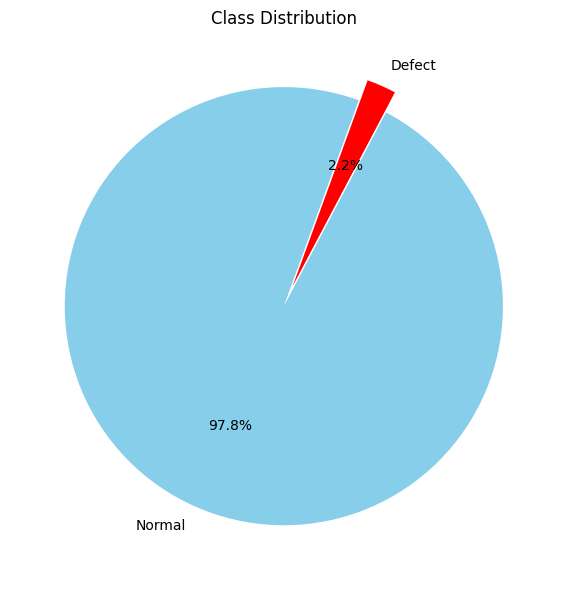

In [ ]:
plt.figure(figsize=(6, 6), dpi=100)
plt.pie(
    y.value_counts(),
    labels=['Normal', 'Defect'],
    autopct='%1.1f%%',
    startangle=70,
    colors=['skyblue', 'red'],
    explode=[0, 0.1]  # Pull out "Defect" slice for emphasis
)
plt.title('Class Distribution')
plt.tight_layout()
plt.show()


#Model Selection & Evaluation

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state= 10, stratify=y)


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
lr = LogisticRegression(max_iter=1000, class_weight='balanced')
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print(classification_report(y_test, lr_pred))
accuracy_score(y_test, lr_pred)


              precision    recall  f1-score   support

       False       1.00      0.99      0.99       415
        True       0.64      1.00      0.78         9

    accuracy                           0.99       424
   macro avg       0.82      0.99      0.89       424
weighted avg       0.99      0.99      0.99       424



0.9882075471698113

In [ ]:
dt = DecisionTreeClassifier(class_weight='balanced', random_state= 5)

# Train
dt.fit(X_train, y_train)

# Predict
y_pred_dt = dt.predict(X_test)
print(classification_report(y_test, y_pred_dt))
accuracy_score(y_test, y_pred_dt)

              precision    recall  f1-score   support

       False       1.00      0.99      0.99       415
        True       0.64      1.00      0.78         9

    accuracy                           0.99       424
   macro avg       0.82      0.99      0.89       424
weighted avg       0.99      0.99      0.99       424



0.9882075471698113

In [ ]:
# Initialize Random Forest
rf = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state= 10
)

# Train
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))
accuracy_score(y_test, y_pred_rf)

              precision    recall  f1-score   support

       False       1.00      0.99      0.99       415
        True       0.64      1.00      0.78         9

    accuracy                           0.99       424
   macro avg       0.82      0.99      0.89       424
weighted avg       0.99      0.99      0.99       424



0.9882075471698113

In [ ]:
# Clean column names to make them XGBoost-safe
X_train.columns = X_train.columns.str.replace(r'[\[\]<>]', '', regex=True)
X_test.columns = X_test.columns.str.replace(r'[\[\]<>]', '', regex=True)


In [ ]:
# Handle imbalance: ratio = (# negative) / (# positive)
pos_ratio = (y_train == 0).sum() / (y_train == 1).sum()

xgb = XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    scale_pos_weight=pos_ratio,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Ensure X_train column names are strings before fitting
X_train.columns = X_train.columns.astype(str)

# Train
xgb.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb.predict(X_test)
print(classification_report(y_test, y_pred_xgb))
accuracy_score(y_test, y_pred_xgb)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:50:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

       False       1.00      0.99      0.99       415
        True       0.64      1.00      0.78         9

    accuracy                           0.99       424
   macro avg       0.82      0.99      0.89       424
weighted avg       0.99      0.99      0.99       424



0.9882075471698113

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Re-split to keep everything fresh
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=10,
    stratify=y
)

# Apply SMOTE to training data
smote = SMOTE(random_state = 10)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr_smote = LogisticRegression(max_iter=1000, random_state=10)
lr_smote.fit(X_resampled, y_resampled)

y_pred_lr_smote = lr_smote.predict(X_test)
print(classification_report(y_test, y_pred_lr_smote))
accuracy_score(y_test, y_pred_lr_smote)


              precision    recall  f1-score   support

       False       1.00      0.99      0.99       415
        True       0.64      1.00      0.78         9

    accuracy                           0.99       424
   macro avg       0.82      0.99      0.89       424
weighted avg       0.99      0.99      0.99       424



0.9882075471698113

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_smote = DecisionTreeClassifier(class_weight='balanced', random_state=10)
dt_smote.fit(X_resampled, y_resampled)

y_pred_dt_smote = dt_smote.predict(X_test)
print(classification_report(y_test, y_pred_dt_smote))
accuracy_score(y_test, y_pred_dt_smote)


              precision    recall  f1-score   support

       False       0.99      0.99      0.99       415
        True       0.67      0.67      0.67         9

    accuracy                           0.99       424
   macro avg       0.83      0.83      0.83       424
weighted avg       0.99      0.99      0.99       424



0.9858490566037735

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_smote = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=10
)
rf_smote.fit(X_resampled, y_resampled)

y_pred_rf_smote = rf_smote.predict(X_test)
print(classification_report(y_test, y_pred_rf_smote))
accuracy_score(y_test, y_pred_rf_smote)

              precision    recall  f1-score   support

       False       1.00      0.99      0.99       415
        True       0.64      1.00      0.78         9

    accuracy                           0.99       424
   macro avg       0.82      0.99      0.89       424
weighted avg       0.99      0.99      0.99       424



0.9882075471698113

In [ ]:
X_resampled.columns = X_resampled.columns.str.replace(r'[\[\]<>]', '', regex=True)
X_test.columns = X_test.columns.str.replace(r'[\[\]<>]', '', regex=True)

In [ ]:
from xgboost import XGBClassifier

# Adjust imbalance manually using scale_pos_weight
pos_ratio = (y_resampled == 0).sum() / (y_resampled == 1).sum()

xgb_smote = XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    scale_pos_weight=pos_ratio,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=10
)

# Clean column names if needed
X_resampled.columns = X_resampled.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

xgb_smote.fit(X_resampled, y_resampled)
y_pred_xgb_smote = xgb_smote.predict(X_test)

print("XGBoost + SMOTE")
print(classification_report(y_test, y_pred_xgb_smote))
accuracy_score(y_test, y_pred_xgb_smote)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:50:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost + SMOTE
              precision    recall  f1-score   support

       False       1.00      0.99      0.99       415
        True       0.64      1.00      0.78         9

    accuracy                           0.99       424
   macro avg       0.82      0.99      0.89       424
weighted avg       0.99      0.99      0.99       424



0.9882075471698113

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, accuracy_score

# Define the neural network model
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Set up early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Train
history = nn_model.fit(X_train, y_train,
                       epochs=200,
                       batch_size=32,
                       validation_split=0.2,
                       callbacks=[early_stop],
                       verbose=1)

# Predict on test set; threshold outputs at 0.5
y_pred_nn = (nn_model.predict(X_test) > 0.5).astype(int).flatten()

# Print classification report and accuracy for the neural network
print("Neural Network Classification Report:")
print(classification_report(y_test, y_pred_nn))
print("Neural Network Accuracy:", accuracy_score(y_test, y_pred_nn))


Epoch 1/200


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.8617 - loss: 0.3820 - val_accuracy: 0.9853 - val_loss: 0.0421
Epoch 2/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9881 - loss: 0.0673 - val_accuracy: 0.9912 - val_loss: 0.0234
Epoch 3/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9841 - loss: 0.0692 - val_accuracy: 0.9882 - val_loss: 0.0258
Epoch 4/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9875 - loss: 0.0399 - val_accuracy: 0.9912 - val_loss: 0.0286
Epoch 5/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9888 - loss: 0.0352 - val_accuracy: 0.9882 - val_loss: 0.0214
Epoch 6/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9811 - loss: 0.0410 - val_accuracy: 0.9882 - val_loss: 0.0238
Epoch 7/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9826 - loss: 0.0308 - val_accuracy: 0.9912 - val_loss: 0.0206
Epoch 8/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9869 - loss: 0.0307 - val_accuracy: 0.9882 - val_loss: 0.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report, accuracy_score

# Define the improved neural network model
nn_model = Sequential()

# Input layer with 128 neurons, BatchNorm, LeakyReLU, and dropout
nn_model.add(Dense(128, input_shape=(X_train.shape[1],)))
nn_model.add(BatchNormalization())
nn_model.add(LeakyReLU(alpha=0.1))
nn_model.add(Dropout(0.4))

# Hidden layer 1: 64 neurons
nn_model.add(Dense(64))
nn_model.add(BatchNormalization())
nn_model.add(LeakyReLU(alpha=0.1))
nn_model.add(Dropout(0.3))

# Hidden layer 2: 32 neurons
nn_model.add(Dense(32))
nn_model.add(BatchNormalization())
nn_model.add(LeakyReLU(alpha=0.1))
nn_model.add(Dropout(0.2))

# Output layer: 1 neuron with sigmoid activation for binary classification
nn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Setup callbacks: Early stopping and Model Checkpointing
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint("best_nn_model.h5", monitor='val_loss', save_best_only=True)

# Train the model
history = nn_model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop, checkpoint],
    verbose=1
)

# Make predictions on the test set; threshold probabilities at 0.5
y_pred_nn = (nn_model.predict(X_test) > 0.5).astype(int).flatten()

# Output classification report and accuracy
print("Improved Neural Network Classification Report:")
print(classification_report(y_test, y_pred_nn))
print("Improved Neural Network Accuracy:", accuracy_score(y_test, y_pred_nn))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.7873 - loss: 0.4836

43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 78ms/step - accuracy: 0.7886 - loss: 0.4822 - val_accuracy: 0.9618 - val_loss: 0.4925
Epoch 2/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9436 - loss: 0.2786

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9439 - loss: 0.2781 - val_accuracy: 0.9794 - val_loss: 0.3536
Epoch 3/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9724 - loss: 0.1815

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9724 - loss: 0.1814 - val_accuracy: 0.9824 - val_loss: 0.2333
Epoch 4/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9806 - loss: 0.1376

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9806 - loss: 0.1375 - val_accuracy: 0.9824 - val_loss: 0.1595
Epoch 5/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9720 - loss: 0.1123

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9722 - loss: 0.1121 - val_accuracy: 0.9853 - val_loss: 0.0985
Epoch 6/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9738 - loss: 0.1170

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9740 - loss: 0.1166 - val_accuracy: 0.9853 - val_loss: 0.0985
Epoch 7/200
42/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9717 - loss: 0.0989

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9719 - loss: 0.0984 - val_accuracy: 0.9853 - val_loss: 0.0784
Epoch 8/200
41/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9782 - loss: 0.0831

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9783 - loss: 0.0828 - val_accuracy: 0.9853 - val_loss: 0.0650
Epoch 9/200
42/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9897 - loss: 0.0618

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9895 - loss: 0.0622 - val_accuracy: 0.9824 - val_loss: 0.0619
Epoch 10/200
42/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9814 - loss: 0.0715

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9815 - loss: 0.0713 - val_accuracy: 0.9824 - val_loss: 0.0436
Epoch 11/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9917 - loss: 0.0463

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9916 - loss: 0.0466 - val_accuracy: 0.9882 - val_loss: 0.0379
Epoch 12/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9802 - loss: 0.0685

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9802 - loss: 0.0684 - val_accuracy: 0.9824 - val_loss: 0.0354
Epoch 13/200
42/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9866 - loss: 0.0587

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9866 - loss: 0.0583 - val_accuracy: 0.9824 - val_loss: 0.0332
Epoch 14/200
38/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9809 - loss: 0.0499

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9809 - loss: 0.0498 - val_accuracy: 0.9853 - val_loss: 0.0307
Epoch 15/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9823 - loss: 0.0461 - val_accuracy: 0.9824 - val_loss: 0.0325
Epoch 16/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9842 - loss: 0.0459 - val_accuracy: 0.9853 - val_loss: 0.0390
Epoch 17/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9802 - loss: 0.0423 - val_accuracy: 0.9824 - val_loss: 0.0339
Epoch 18/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9831 - loss: 0.0447 - val_accuracy: 0.9824 - val_loss: 0.0327
Epoch 19/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9875 - loss: 0.0412 - val_accuracy: 0.9824 - val_loss: 0.0309
Epoch 20/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9825 - loss: 0.0448

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9825 - loss: 0.0447 - val_accuracy: 0.9824 - val_loss: 0.0283
Epoch 21/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9861 - loss: 0.0350 - val_accuracy: 0.9853 - val_loss: 0.0359
Epoch 22/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9842 - loss: 0.0363 - val_accuracy: 0.9824 - val_loss: 0.0343
Epoch 23/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9830 - loss: 0.0399 - val_accuracy: 0.9794 - val_loss: 0.0325
Epoch 24/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9881 - loss: 0.0373 - val_accuracy: 0.9794 - val_loss: 0.0316
Epoch 25/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9841 - loss: 0.0368 - val_accuracy: 0.9853 - val_loss: 0.0359
Epoch 26/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9857 - loss: 0.0324 - val_accuracy: 0.9882 - val_loss: 0.0314
Epoch 27/200
30/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9922 - loss: 0.0222

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9901 - loss: 0.0261 - val_accuracy: 0.9853 - val_loss: 0.0272
Epoch 28/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9872 - loss: 0.0297 - val_accuracy: 0.9882 - val_loss: 0.0334
Epoch 29/200
40/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9875 - loss: 0.0300

43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9875 - loss: 0.0299 - val_accuracy: 0.9853 - val_loss: 0.0263
Epoch 30/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9817 - loss: 0.0450 - val_accuracy: 0.9824 - val_loss: 0.0508
Epoch 31/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9866 - loss: 0.0301 - val_accuracy: 0.9882 - val_loss: 0.0276
Epoch 32/200
42/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9915 - loss: 0.0203

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9913 - loss: 0.0207 - val_accuracy: 0.9853 - val_loss: 0.0233
Epoch 33/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9884 - loss: 0.0322 - val_accuracy: 0.9882 - val_loss: 0.0254
Epoch 34/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9820 - loss: 0.0341 - val_accuracy: 0.9853 - val_loss: 0.0248
Epoch 35/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9904 - loss: 0.0265 - val_accuracy: 0.9882 - val_loss: 0.0269
Epoch 36/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9924 - loss: 0.0245 - val_accuracy: 0.9853 - val_loss: 0.0269
Epoch 37/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9837 - loss: 0.0359 - val_accuracy: 0.9853 - val_loss: 0.0328
Epoch 38/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9885 - loss: 0.0272 - val_accuracy: 0.9794 - val_loss: 0.0242
Epoch 39/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9873 - loss: 0.0299 - val_accuracy: 0.9853 - val_lo

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9859 - loss: 0.0296 - val_accuracy: 0.9853 - val_loss: 0.0228
Epoch 41/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9908 - loss: 0.0216 - val_accuracy: 0.9824 - val_loss: 0.0231
Epoch 42/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9901 - loss: 0.0315 - val_accuracy: 0.9853 - val_loss: 0.0254
Epoch 43/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9910 - loss: 0.0230 - val_accuracy: 0.9824 - val_loss: 0.0231
Epoch 44/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9852 - loss: 0.0355 - val_accuracy: 0.9824 - val_loss: 0.0232
Epoch 45/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9882 - loss: 0.0243 - val_accuracy: 0.9853 - val_loss: 0.0238
Epoch 46/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9912 - loss: 0.0320 - val_accuracy: 0.9853 - val_loss: 0.0259
Epoch 47/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9910 - loss: 0.0230 - val_accuracy: 0.9794 - val_lo